# Sentiment Analysis of YouTube Channel

#### We are using the Youtube dataset to form some sentiment analysis on top of that.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
comments=pd.read_csv(r"F:\Python_Data_Analyis_Project\UScomments.csv", error_bad_lines= False)

C:\Users\admin\AppData\Local\Temp\ipykernel_10292\3527028272.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r"F:\Python_Data_Analyis_Project\UScomments.csv", error_bad_lines= False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\admin\AppData\Local\Temp\ipykernel_10292\3527028272.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r"F:\Python_Data_Analyis_Project\UScomments.csv", error_bad_lines= False)


In [6]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
from textblob import TextBlob

In [10]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [118]:
df=comments

In [119]:
polarity=[]
for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [120]:
df['polarity']=polarity

In [121]:
df.head(14)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


Changing positive polarity as 1 and Negative as -1

In [122]:
comments_positive= df[df["polarity"]==1]
comments_negative=df[df["polarity"]==-1]

In [123]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [124]:
from wordcloud import WordCloud, STOPWORDS

In [125]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [126]:
Total_comments=' '.join(comments_negative['comment_text'])

In [127]:
Total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

### Negative WordCloud Analysis

(-0.5, 399.5, 199.5, -0.5)

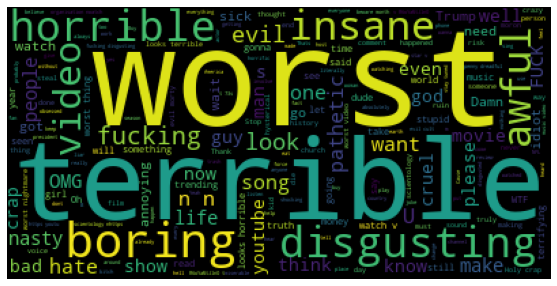

In [128]:
wordcloud= WordCloud(stopwords=set(STOPWORDS)).generate(Total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [129]:
Total_comments2=' '.join(comments_positive['comment_text'])

### Positive WordCloud Analysis

(-0.5, 399.5, 199.5, -0.5)

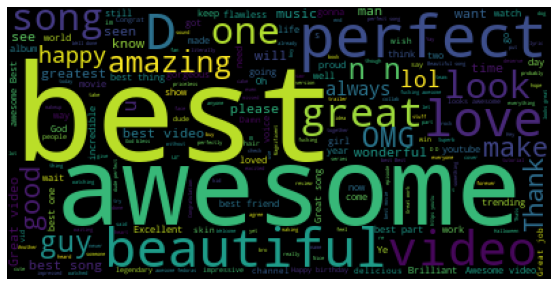

In [130]:
wordcloud= WordCloud(stopwords=set(STOPWORDS)).generate(Total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Emoji Analysis

In [131]:
# Install a package called Emoji
!pip install emoji

In [132]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [133]:
import emoji

In [134]:
emojies_list=[]

In [135]:
import emoji
emojis_list = []
for comment in df['comment_text']:
    emojis_list.extend([j for j in comment if emoji.is_emoji(j)])


In [136]:
emojis_list[0:10]


['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

## Conversion of Emojis into its dictionary having frequencies as its value.

In [137]:
def frequency_dict(emojis_list):
    dict={}
    for char in emojis_list:
        if char in dict:
            dict[char]+=1
        else:
            dict[char]=1
    return dict

In [138]:
frequency_dict(emojis_list)

{'‼': 211,
 '😉': 998,
 '😭': 8398,
 '👍': 5476,
 '🏻': 3438,
 '❤': 31119,
 '😍': 33453,
 '💋': 968,
 '💙': 2831,
 '👈': 126,
 '😂': 36987,
 '🔥': 8694,
 '👻': 268,
 '💎': 316,
 '😆': 1149,
 '😁': 2220,
 '😒': 629,
 '👏': 5719,
 '😊': 3596,
 '👌': 3112,
 '🤔': 1592,
 '💔': 617,
 '👎': 673,
 '🍎': 49,
 '😤': 378,
 '😢': 2672,
 '👫': 33,
 '💘': 702,
 '😻': 1409,
 '💖': 5359,
 '🌟': 549,
 '😮': 1232,
 '👇': 151,
 '😳': 398,
 '😠': 599,
 '😴': 187,
 '😝': 413,
 '™': 46,
 '☺': 1180,
 '😔': 545,
 '😩': 1472,
 '😡': 478,
 '🙏': 1818,
 '😄': 1496,
 '😬': 3381,
 '☹': 173,
 '🤷': 334,
 '🤣': 2279,
 '😃': 1235,
 '🏽': 1593,
 '🍏': 56,
 '😓': 280,
 '🤦': 390,
 '♀': 523,
 '😞': 364,
 '🏼': 2549,
 '✌': 835,
 '💀': 926,
 '👀': 495,
 '😱': 2094,
 '👑': 678,
 '🌮': 69,
 '😀': 1734,
 '💆': 20,
 '🏿': 501,
 '♂': 507,
 '😅': 1070,
 '🐂': 12,
 '💩': 925,
 '💕': 5147,
 '💓': 1540,
 '💗': 2144,
 '💝': 592,
 '💜': 3429,
 '😎': 1358,
 '🎉': 684,
 '😋': 596,
 '😘': 5545,
 '😐': 644,
 '😕': 453,
 '🤘': 619,
 '🙌': 2233,
 '😏': 623,
 '😛': 266,
 '🌳': 10,
 '🌽': 36,
 '🎃': 739,
 '🚣': 15,
 '

In [139]:
import collections
counter = collections.Counter(frequency_dict(emojis_list))
counter.most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [148]:
emojis=[counter.most_common(10)[i][0] for i in range (10)]
freq=[counter.most_common(10)[i][1] for i in range (10)] 

In [156]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [157]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [151]:
pip install plotly

In [152]:
import plotly.graph_objs as go

In [162]:
from plotly.offline import iplot

In [169]:
trace=go.Bar(x=emojis, y=freq)

In [170]:
fig = go.Figure(trace)
fig.show()